#**Import Required Libararies:**

In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import feature_extraction
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn import pipeline
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay
import itertools

# **Loading Dataset:**

In [4]:
data = pd.read_csv("dataset.csv") 
# print the first 5 rows of the data
data.head()

# print a specific row
#print(data.loc[[46]])


,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch


In the following cell, we just make sure if there is missing values in the data.

In [5]:
# Make sure that there are no None values in the dataset
count_with_non = data[data. columns[0]]. count()
print(count_with_non)
data.dropna(inplace = True)
count_without_non = data[data. columns[0]]. count()
print(count_without_non)
print("There is no none values in the data")

22000
22000
There is no none values in the data


Here, we just make sure that the dataset is balanced to know if choosing the accuracy metric is valid in this case or not.

In [49]:
data['language'].value_counts()

Russian       1000
Swedish       1000
English       1000
Pushto        1000
Chinese       1000
Indonesian    1000
Dutch         1000
French        1000
Persian       1000
Japanese      1000
Turkish       1000
Urdu          1000
Estonian      1000
Thai          1000
Hindi         1000
Arabic        1000
Spanish       1000
Tamil         1000
Portugese     1000
Latin         1000
Korean        1000
Romanian      1000
Name: language, dtype: int64

# **Data Visualization:**

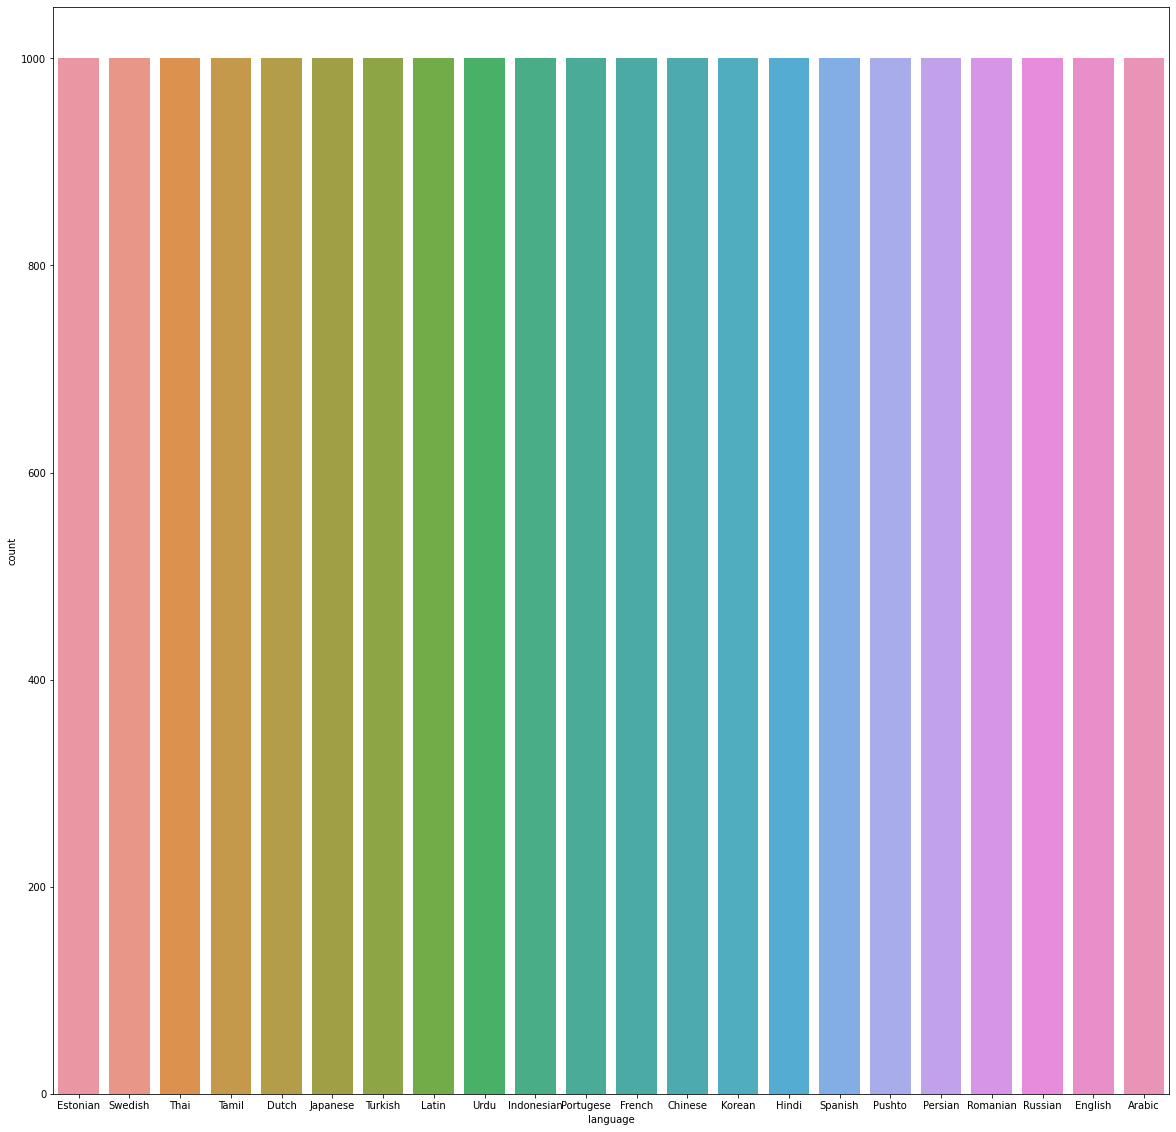

In [9]:
plt.figure(figsize=(20,20))
sns.countplot(x = data['language'], data=data)

# **Data Splitting:**

In [51]:
X = data[data. columns[0]]
Y = data[data. columns[1]]
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=42)
print(X_test.count())

4400


# **Features Extraction:**

In [65]:
vectorizer = feature_extraction.text.TfidfVectorizer(ngram_range=(1,3), analyzer='char')
vectorizer2 = feature_extraction.text.CountVectorizer(ngram_range=(1,3), analyzer='char')

# **Logistic Regression  Model:**

### **Logistic Regression with TF-IDF vectorizer:**

In [53]:
pipe_lr = pipeline.Pipeline([
    ('vectorizer', vectorizer),
    ('lr_clf', LogisticRegression())
])

In [54]:
pipe_lr.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='char', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 3), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('lr_clf',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept

In [140]:
lr_predicted = pipe_lr.predict(X_test)
lr_predicted_training = pipe_lr.predict(X_train)

In [147]:
lr_training_acc = (metrics.accuracy_score(y_train, lr_predicted_training))*100
print('The logistic regression with TF-IDF vectorizer has training accuracy:',lr_training_acc,'% accuracy')

The logistic regression with TF-IDF vectorizer has training accuracy: 98.57954545454545 % accuracy


In [56]:
lr_acc = (metrics.accuracy_score(y_test, lr_predicted))*100
print('The logistic regression with TF-IDF vectorizer has test accuracy:',lr_acc,'% accuracy')

The logistic regression has: 98.18181818181819 % accuracy


In the following cells, we can see the classification report with different metrics and also the confusion matrix.

In [106]:
print(classification_report(y_test, lr_predicted))

              precision    recall  f1-score   support

      Arabic       1.00      1.00      1.00       202
     Chinese       0.99      0.99      0.99       201
       Dutch       0.97      0.99      0.98       230
     English       0.82      0.99      0.90       194
    Estonian       0.99      0.95      0.97       200
      French       0.97      0.99      0.98       188
       Hindi       1.00      0.99      0.99       208
  Indonesian       1.00      0.98      0.99       213
    Japanese       1.00      0.99      0.99       194
      Korean       1.00      0.99      1.00       190
       Latin       0.95      0.94      0.94       210
     Persian       0.99      0.99      0.99       196
   Portugese       0.97      0.97      0.97       194
      Pushto       1.00      0.95      0.98       196
    Romanian       1.00      0.97      0.99       197
     Russian       0.98      1.00      0.99       213
     Spanish       0.99      0.97      0.98       199
     Swedish       1.00    

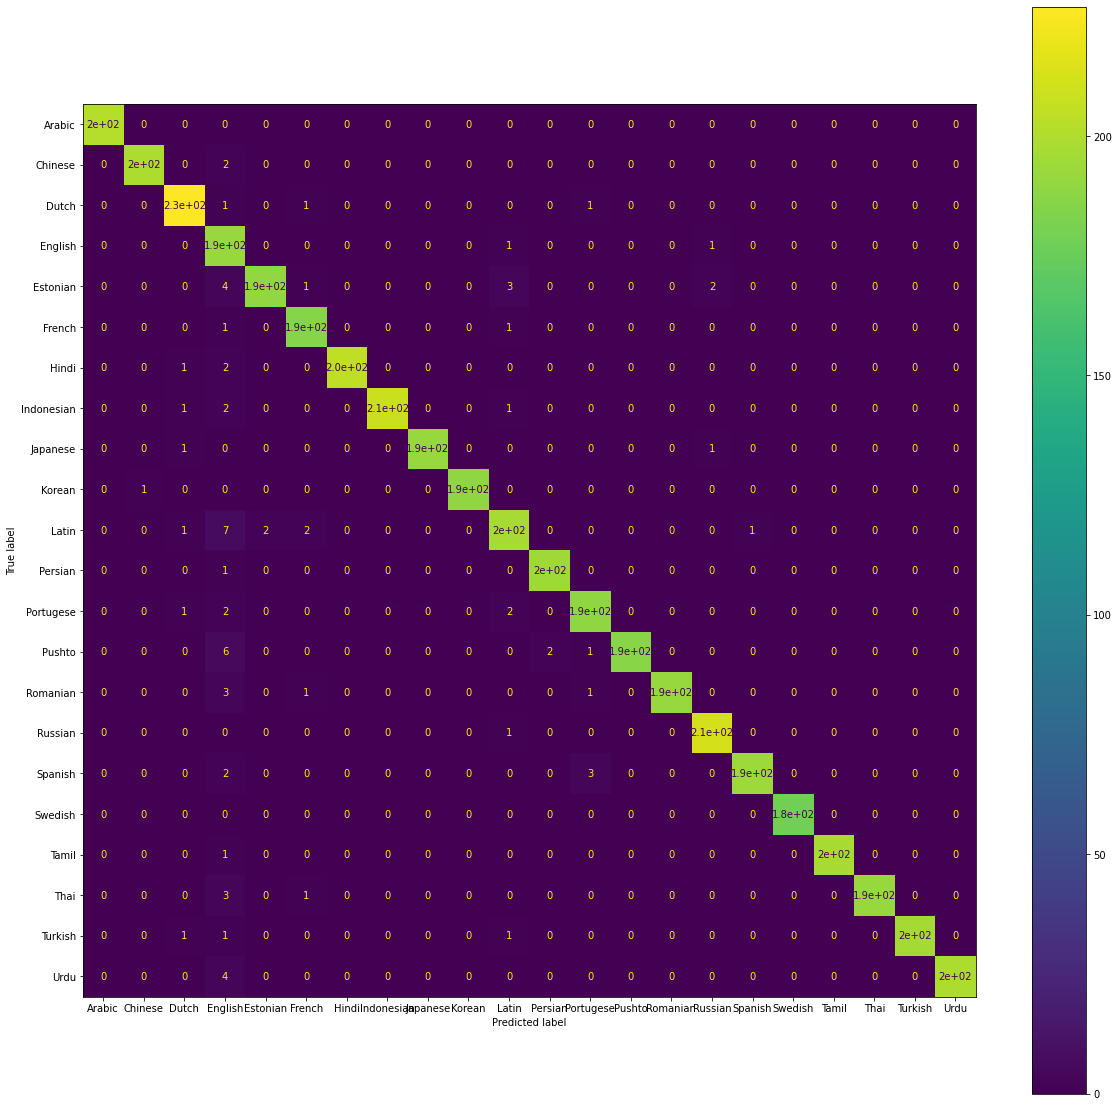

In [109]:
fig, ax = plt.subplots(figsize=(20, 20))
plot_confusion_matrix(pipe_lr, X_test, y_test, ax=ax)  
plt.show()

### **Logistic Regression with Bag of Words Vectorizer:**

In [58]:
pipe_lr_BoW = pipeline.Pipeline([
    ('vectorizer2', vectorizer2),
    ('lr_clf', LogisticRegression())
])

In [59]:
pipe_lr_BoW.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Pipeline(memory=None,
         steps=[('vectorizer2',
                 CountVectorizer(analyzer='char', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 3), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('lr_clf',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                

In [150]:
lr_predicted_BoW = pipe_lr_BoW.predict(X_test)
lr_predicted_BoW_training = pipe_lr_BoW.predict(X_train)

In [151]:
lr_acc_BoW_training = (metrics.accuracy_score(y_train, lr_predicted_BoW_training))*100
print('The logistic regression with Bag of words vectorizer has training accuracy is :',lr_acc_BoW_training,'% accuracy')

The logistic regression with Bag of words vectorizer has training accuracy is : 99.99431818181819 % accuracy


In [61]:
lr_acc_BoW = (metrics.accuracy_score(y_test, lr_predicted_BoW))*100
print('The logistic regression with Bag of words vectorizer has test accuracy:',lr_acc_BoW,'% accuracy')

The logistic regression with Bag of words vectorizer has: 98.4090909090909 % accuracy


In [145]:
print(classification_report(y_test, lr_predicted_BoW))

              precision    recall  f1-score   support

      Arabic       1.00      1.00      1.00       202
     Chinese       1.00      0.99      0.99       201
       Dutch       1.00      0.98      0.99       230
     English       0.90      0.96      0.93       194
    Estonian       0.96      0.95      0.96       200
      French       0.97      0.99      0.98       188
       Hindi       1.00      0.99      0.99       208
  Indonesian       0.99      0.99      0.99       213
    Japanese       1.00      0.99      0.99       194
      Korean       1.00      1.00      1.00       190
       Latin       0.95      0.96      0.96       210
     Persian       0.99      0.99      0.99       196
   Portugese       0.97      0.98      0.98       194
      Pushto       0.98      0.97      0.97       196
    Romanian       0.99      0.97      0.98       197
     Russian       0.99      1.00      0.99       213
     Spanish       0.98      0.99      0.98       199
     Swedish       1.00    

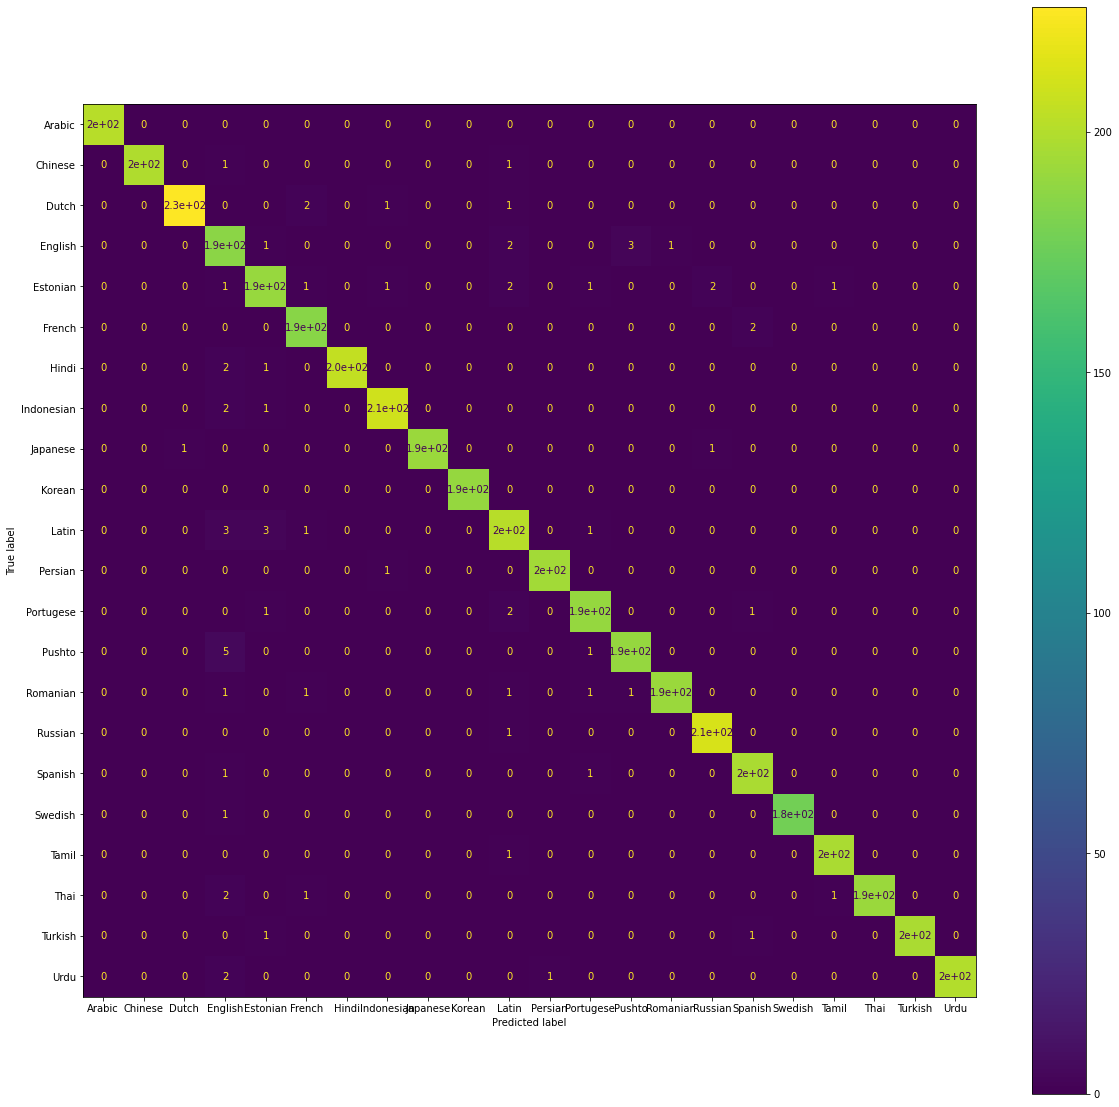

In [146]:
fig, ax = plt.subplots(figsize=(20, 20))
plot_confusion_matrix(pipe_lr_BoW, X_test, y_test, ax=ax)  
plt.show()

# **Support Vector Machine model:**

### **Support Vector Machine with TF-IDF Vectorizer:**

In [68]:
pipe_svm = pipeline.Pipeline([
    ('vectorizer', vectorizer),
    ('svm_clf', SVC())
])

In [153]:
pipe_svm.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='char', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 3), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('svm_clf',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='

In [154]:
svm_predicted = pipe_svm.predict(X_test)
svm_predicted_training = pipe_svm.predict(X_train)

In [155]:
svm_acc_training = (metrics.accuracy_score(y_train, svm_predicted_training))*100
print('The support vector machine with TF-IDF vectorizer has training accuracy:',svm_acc_training,'% accuracy')

The support vector machine with TF-IDF vectorizer has training accuracy: 99.2784090909091 % accuracy


In [156]:
svm_acc = (metrics.accuracy_score(y_test, svm_predicted))*100
print('The support vector machine with TF-IDF vectorizer has test accuracy:',svm_acc,'% accuracy')

The support vector machine with TF-IDF vectorizer has test accuracy: 98.38636363636364 % accuracy


In [157]:
print(classification_report(y_test, svm_predicted))

              precision    recall  f1-score   support

      Arabic       1.00      1.00      1.00       202
     Chinese       0.99      0.99      0.99       201
       Dutch       0.99      0.99      0.99       230
     English       0.84      0.99      0.91       194
    Estonian       0.99      0.95      0.97       200
      French       0.97      0.99      0.98       188
       Hindi       1.00      0.99      0.99       208
  Indonesian       1.00      0.98      0.99       213
    Japanese       1.00      0.99      0.99       194
      Korean       1.00      0.99      1.00       190
       Latin       0.94      0.96      0.95       210
     Persian       0.99      0.99      0.99       196
   Portugese       0.97      0.99      0.98       194
      Pushto       1.00      0.96      0.98       196
    Romanian       1.00      0.97      0.99       197
     Russian       0.99      1.00      0.99       213
     Spanish       1.00      0.98      0.99       199
     Swedish       1.00    

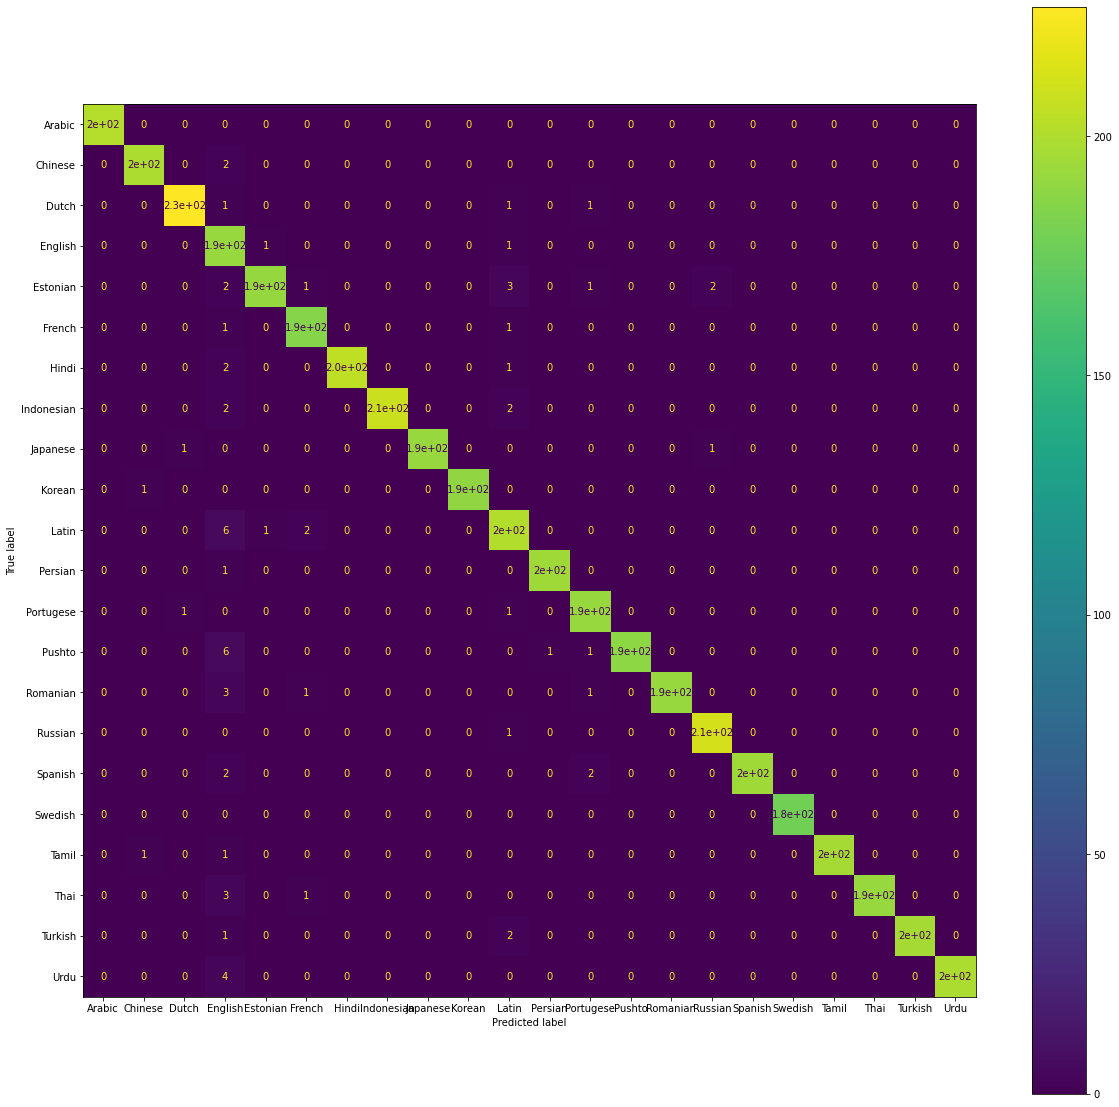

In [158]:
fig, ax = plt.subplots(figsize=(20, 20))
plot_confusion_matrix(pipe_svm, X_test, y_test, ax=ax)  
plt.show()

### **Support Vector Machine with Bag of Words Vectorizer:**

In [159]:
pipe_svm_BoW = pipeline.Pipeline([
    ('vectorizer2', vectorizer2),
    ('svm_clf', SVC())
])

In [160]:
pipe_svm_BoW.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vectorizer2',
                 CountVectorizer(analyzer='char', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 3), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('svm_clf',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
        

In [161]:
svm_predicted_BoW = pipe_svm_BoW.predict(X_test)
svm_predicted_BoW_training = pipe_svm_BoW.predict(X_train)

In [162]:
svm_acc_BoW_training = (metrics.accuracy_score(y_train, svm_predicted_BoW_training))*100
print('The support vector machine with Bag of words vectorizer has Training accuracy:',svm_acc_BoW_training,'% accuracy')

The support vector machine with Bag of words vectorizer has Training accuracy: 97.9034090909091 % accuracy


In [163]:
svm_acc_BoW = (metrics.accuracy_score(y_test, svm_predicted_BoW))*100
print('The support vector machine with Bag of words vectorizer has test accuracy:',svm_acc,'% accuracy')

The support vector machine with Bag of words vectorizer has test accuracy: 98.38636363636364 % accuracy


In [164]:
print(classification_report(y_test, svm_predicted_BoW))


              precision    recall  f1-score   support

      Arabic       1.00      1.00      1.00       202
     Chinese       0.99      0.99      0.99       201
       Dutch       0.96      0.97      0.97       230
     English       0.79      0.98      0.88       194
    Estonian       0.98      0.94      0.96       200
      French       0.95      0.98      0.97       188
       Hindi       1.00      0.99      0.99       208
  Indonesian       1.00      0.97      0.99       213
    Japanese       1.00      0.97      0.99       194
      Korean       0.99      0.99      0.99       190
       Latin       0.92      0.93      0.93       210
     Persian       0.99      0.99      0.99       196
   Portugese       0.96      0.95      0.96       194
      Pushto       1.00      0.95      0.98       196
    Romanian       1.00      0.97      0.98       197
     Russian       0.99      1.00      0.99       213
     Spanish       1.00      0.96      0.98       199
     Swedish       1.00    

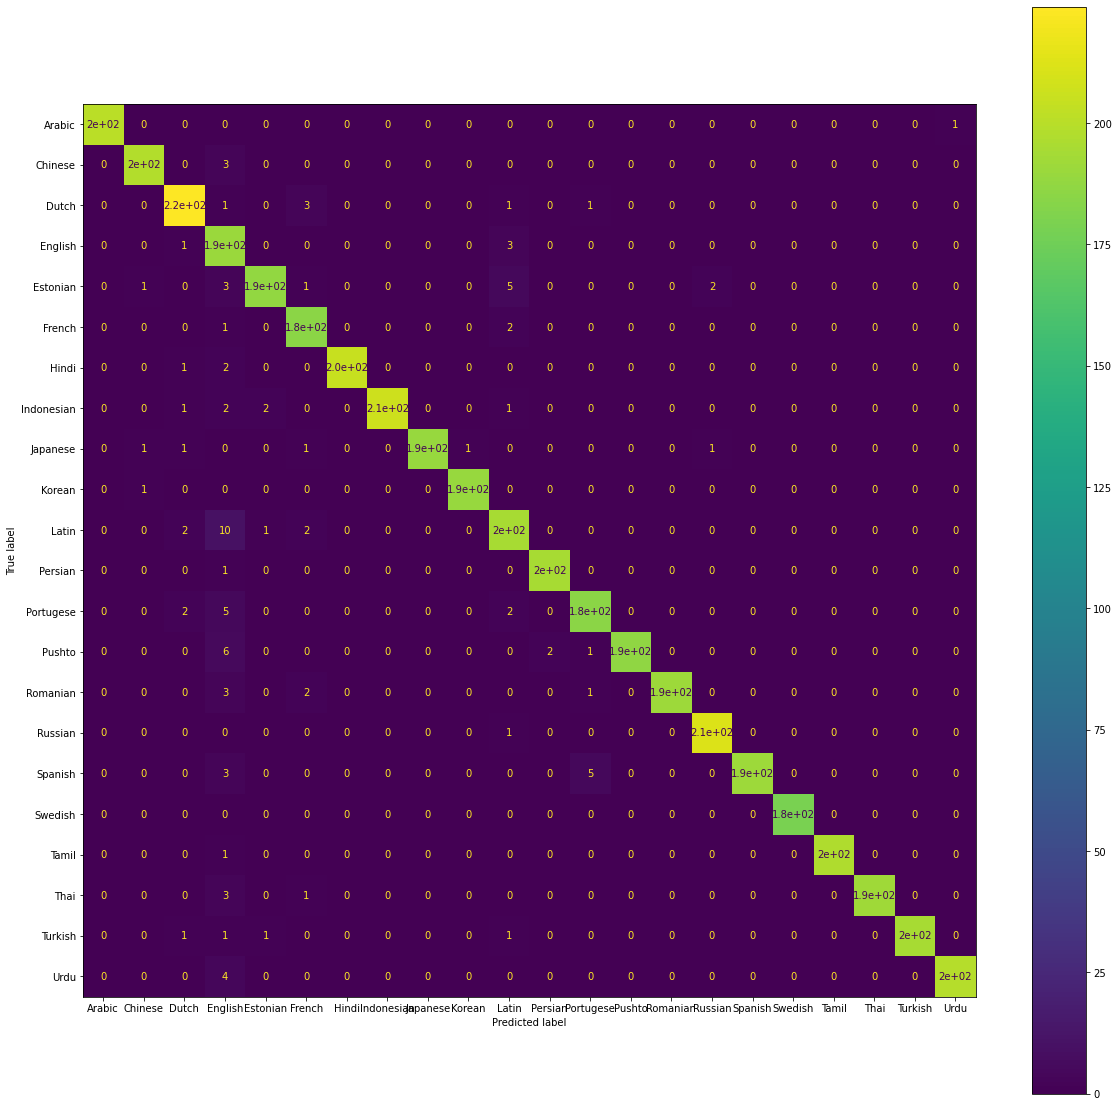

In [92]:
fig, ax = plt.subplots(figsize=(20, 20))
plot_confusion_matrix(pipe_svm_BoW, X_test, y_test, ax=ax)  
plt.show()

# **Neural Network Model:**

### **Multi-layer Perceptron model with TF-IDF vectorizer:**

In [166]:
tfidf_vect = feature_extraction.text.TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}')
tfidf_vect.fit(X)

# transform the training and validation data using count vectorizer object
xtrain_vectorized_tf = tfidf_vect.transform(X_train)
xtest_vectorized_tf = tfidf_vect.transform(X_test)

In [168]:
mlp = MLPClassifier(hidden_layer_sizes=(20, 20, 20), max_iter=1000)
mlp.fit(xtrain_vectorized_tf, y_train.values.ravel())

#Make predictions on the given data
predictions_tf = mlp.predict(xtest_vectorized_tf)
predictions_tf_training = mlp.predict(xtrain_vectorized_tf)

mlp_acc_tf_training = (metrics.accuracy_score(y_train, predictions_tf_training))*100
print('The Multi layer perceptron with TF-IDF vectorizer has training accuracy:',mlp_acc_tf_training,'% accuracy')

mlp_acc_tf = (metrics.accuracy_score(y_test, predictions_tf))*100
print('The Multi layer perceptron with TF-IDF vectorizer has test accuracy:',mlp_acc_tf,'% accuracy')


The Multi layer perceptron with TF-IDF vectorizer has training accuracy: 99.99431818181819 % accuracy
The Multi layer perceptron with TF-IDF vectorizer has test accuracy: 95.43181818181819 % accuracy


In [169]:
print(classification_report(y_test, predictions_tf))

              precision    recall  f1-score   support

      Arabic       1.00      1.00      1.00       202
     Chinese       0.58      0.99      0.73       201
       Dutch       0.93      1.00      0.96       230
     English       0.93      0.97      0.95       194
    Estonian       0.99      0.96      0.98       200
      French       0.95      0.98      0.97       188
       Hindi       1.00      0.99      0.99       208
  Indonesian       1.00      0.98      0.99       213
    Japanese       0.99      0.42      0.59       194
      Korean       1.00      0.98      0.99       190
       Latin       0.99      0.92      0.96       210
     Persian       1.00      0.99      0.99       196
   Portugese       0.97      0.99      0.98       194
      Pushto       0.97      0.97      0.97       196
    Romanian       1.00      0.97      0.98       197
     Russian       0.99      0.99      0.99       213
     Spanish       1.00      0.97      0.98       199
     Swedish       1.00    

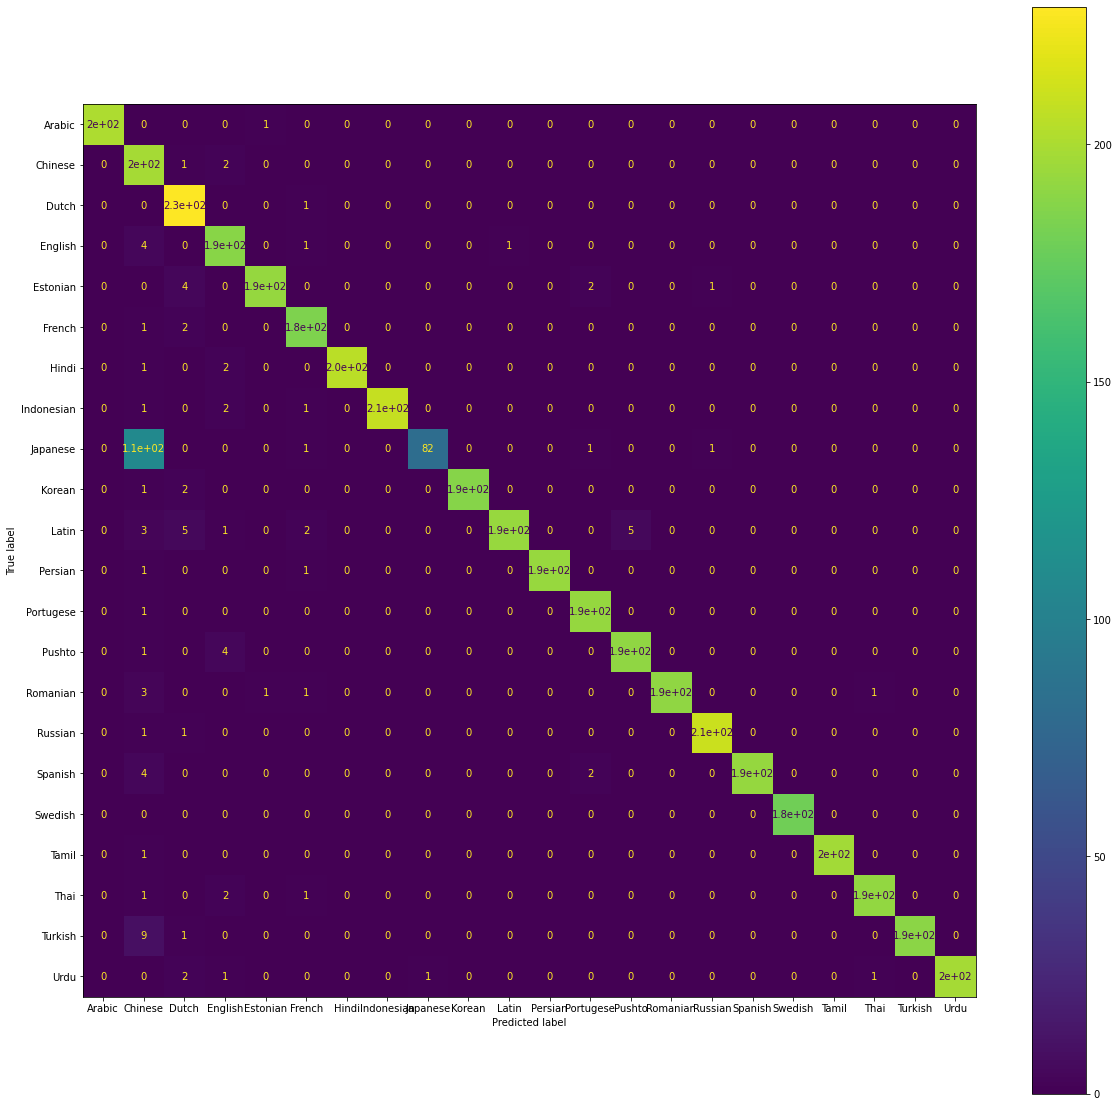

In [170]:
cm = confusion_matrix(y_test, predictions_tf)
cmp = ConfusionMatrixDisplay(cm, display_labels=mlp.classes_)
fig, ax = plt.subplots(figsize=(20,20))
cmp.plot(ax=ax)

### **Multi-layer Perceptron model with Bag of words vectorizer:**

In [171]:
BoW_vect = feature_extraction.text.CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
BoW_vect.fit(X)

# transform the training and validation data using count vectorizer object
xtrain_vectorized_BoW = BoW_vect.transform(X_train)
xtest_vectorized_BoW = BoW_vect.transform(X_test)

In [172]:
mlp = MLPClassifier(hidden_layer_sizes=(20, 20, 20), max_iter=1000)
mlp.fit(xtrain_vectorized_BoW, y_train.values.ravel())

#Make predictions on the given data
predictions_BoW = mlp.predict(xtest_vectorized_BoW)
predictions_BoW_training = mlp.predict(xtrain_vectorized_BoW)

mlp_acc_BoW_training = (metrics.accuracy_score(y_train, predictions_BoW_training ))*100
print('The Multi layer perceptron with Bag of words vectorizer has training accuracy:',mlp_acc_BoW_training,'% accuracy')

mlp_acc_BoW = (metrics.accuracy_score(y_test, predictions_BoW))*100
print('The Multi layer perceptron with Bag of words vectorizer has test accuracy:',mlp_acc,'% accuracy')



The Multi layer perceptron with Bag of words vectorizer has training accuracy: 99.99431818181819 % accuracy
The Multi layer perceptron with Bag of words vectorizer has test accuracy: 95.79545454545455 % accuracy


In [123]:
print(classification_report(y_test, predictions_BoW))


              precision    recall  f1-score   support

      Arabic       1.00      1.00      1.00       202
     Chinese       0.89      0.65      0.75       201
       Dutch       0.99      0.99      0.99       230
     English       0.85      0.98      0.91       194
    Estonian       1.00      0.96      0.98       200
      French       0.96      0.99      0.97       188
       Hindi       0.99      0.99      0.99       208
  Indonesian       1.00      0.99      1.00       213
    Japanese       0.71      0.89      0.79       194
      Korean       0.99      0.99      0.99       190
       Latin       0.99      0.94      0.97       210
     Persian       1.00      0.99      0.99       196
   Portugese       0.95      1.00      0.97       194
      Pushto       1.00      0.96      0.98       196
    Romanian       0.99      0.97      0.98       197
     Russian       0.98      1.00      0.99       213
     Spanish       0.98      0.98      0.98       199
     Swedish       1.00    

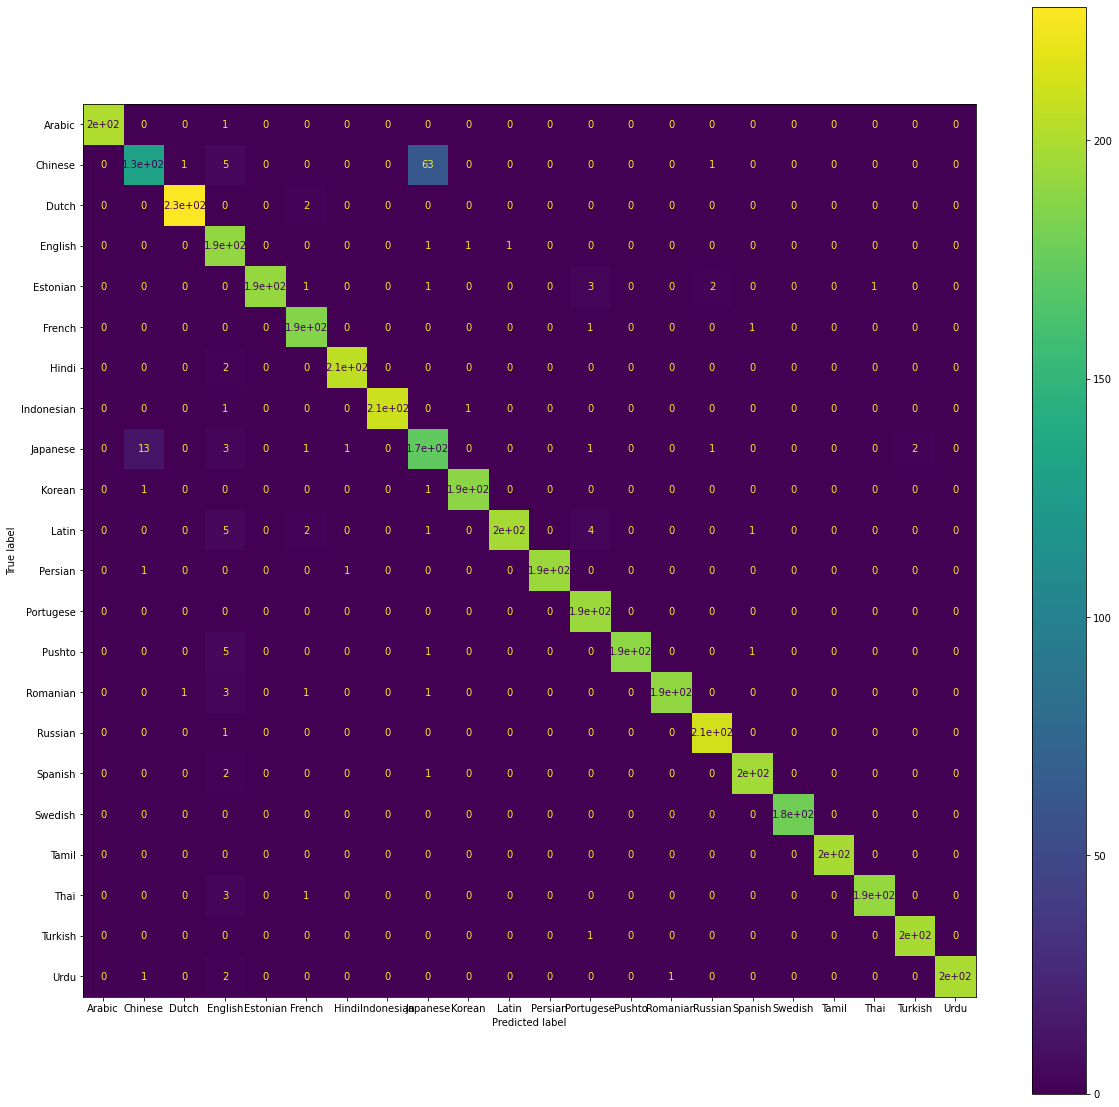

In [130]:

cm = confusion_matrix(y_test, predictions_BoW)
cmp = ConfusionMatrixDisplay(cm, display_labels=mlp.classes_)
fig, ax = plt.subplots(figsize=(20,20))
cmp.plot(ax=ax)